In [48]:
from geopy.distance import geodesic
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np 
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

In [49]:
#define a variable Link1 that contains a URL to an API endpoint for extracting daily air quality data for Barnstable county in Massachusetts, USA, for ozone from January to December 2018.
Link1 = "https://aqs.epa.gov/data/api/dailyData/byCounty?email=canoi@whitman.edu&key=goldmallard38&param=44201&bdate=20160101&edate=20161231&state=25&county=001"

In [50]:
#Parses the response content as JSON using the json() method of the response object, and assigns the resulting JSON data to a variable json_data1.
r1=requests.get(url=Link1)
json_data1=r1.json()
json_data1

{'Header': [{'status': 'Success',
   'request_time': '2023-05-15T21:40:31-04:00',
   'url': 'https://aqs.epa.gov/data/api/dailyData/byCounty?email=canoi@whitman.edu&key=goldmallard38&param=44201&bdate=20160101&edate=20161231&state=25&county=001',
   'rows': 1448}],
 'Data': [{'state_code': '25',
   'county_code': '001',
   'site_number': '0002',
   'parameter_code': '44201',
   'poc': 1,
   'latitude': 41.975804,
   'longitude': -70.023598,
   'datum': 'WGS84',
   'parameter': 'Ozone',
   'sample_duration_code': '1',
   'sample_duration': '1 HOUR',
   'pollutant_standard': 'Ozone 1-hour 1979',
   'date_local': '2016-01-01',
   'units_of_measure': 'Parts per million',
   'event_type': 'No Events',
   'observation_count': 24,
   'observation_percent': 100.0,
   'validity_indicator': 'Y',
   'arithmetic_mean': 0.029792,
   'first_max_value': 0.033,
   'first_max_hour': 15,
   'aqi': None,
   'method_code': '087',
   'method': 'INSTRUMENTAL - ULTRA VIOLET ABSORPTION',
   'local_site_name':

In [51]:
#We write the contents of the CSV file "output.csv" into a pandas DataFrame named df1.
df1 = pd.json_normalize(json_data1["Data"])
df1.to_csv("output.csv", index=False)
df1

state_code county_code site_number parameter_code  poc   latitude  \
0            25         001        0002          44201    1  41.975804   
1            25         001        0002          44201    1  41.975804   
2            25         001        0002          44201    1  41.975804   
3            25         001        0002          44201    1  41.975804   
4            25         001        0002          44201    1  41.975804   
...         ...         ...         ...            ...  ...        ...   
1443         25         001        0002          44201    1  41.975804   
1444         25         001        0002          44201    1  41.975804   
1445         25         001        0002          44201    1  41.975804   
1446         25         001        0002          44201    1  41.975804   
1447         25         001        0002          44201    1  41.975804   

      longitude  datum parameter sample_duration_code  ... method_code  \
0    -70.023598  WGS84     Ozone                    1  ...         087   
1    -70.023598  WGS84     Ozone                    W  ...         087   
2    -70.023598  WGS84     Ozone                    W  ...         087   
3    -70.023598  WGS84     Ozone                    1  ...         087   
4    -70.023598  WGS84     Ozone                    W  ...         087   
...         ...    ...       ...                  ...  ...         ...   
1443 -70.023598  WGS84     Ozone                    W  ...         087   
1444 -70.023598  WGS84     Ozone                    1  ...         087   
1445 -70.023598  WGS84     Ozone                    W  ...         087   
1446 -70.023598  WGS84     Ozone                    W  ...         087   
1447 -70.023598  WGS84     Ozone                    W  ...         087   

                                      method          local_site_name  \
0     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
2     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
3     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
4     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
...                                      ...                      ...   
1443  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1444  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1445  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1446  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1447  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   

         site_address          state      county   city cbsa_code  \
0     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
2     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
3     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
4     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
...               ...            ...         ...    ...       ...   
1443  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1444  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1445  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1446  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1447  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   

                     cbsa  date_of_last_change  
0     Barnstable Town, MA           2021-11-10  
1     Barnstable Town, MA           2023-02-05  
2     Barnstable Town, MA           2023-02-05  
3     Barnstable Town, MA           2021-11-10  
4     Barnstable Town, MA           2023-02-05  
...                   ...                  ...  
1443  Barnstable Town, MA           2023-02-05  
1444  Barnstable Town, MA           2021-11-10  
1445  Barnstable Town, MA           2023-02-05  
1446  Barnstable Town, MA      

In [52]:
# Create a new dataframe with the two variables date_local and arithmentic mean. 
new_df1=df1.loc[:,["date_local", "arithmetic_mean"]]
new_df1

date_local  arithmetic_mean
0     2016-01-01         0.029792
1     2016-01-01         0.030500
2     2016-01-01         0.030500
3     2016-01-02         0.033261
4     2016-01-02         0.032375
...          ...              ...
1443  2016-12-30         0.033941
1444  2016-12-31         0.034542
1445  2016-12-31         0.033895
1446  2016-12-31         0.033895
1447  2016-12-31         0.035500

[1448 rows x 2 columns]

Repeat the same process for ozone data in Barnstable county during 2017

In [53]:
Link2 = "https://aqs.epa.gov/data/api/dailyData/byCounty?email=canoi@whitman.edu&key=goldmallard38&param=44201&bdate=20170101&edate=20171231&state=25&county=001"

In [54]:
r2=requests.get(url=Link2)

In [55]:
json_data2=r2.json()
json_data2

{'Header': [{'status': 'Success',
   'request_time': '2023-05-15T21:40:34-04:00',
   'url': 'https://aqs.epa.gov/data/api/dailyData/byCounty?email=canoi@whitman.edu&key=goldmallard38&param=44201&bdate=20170101&edate=20171231&state=25&county=001',
   'rows': 1419}],
 'Data': [{'state_code': '25',
   'county_code': '001',
   'site_number': '0002',
   'parameter_code': '44201',
   'poc': 1,
   'latitude': 41.975804,
   'longitude': -70.023598,
   'datum': 'WGS84',
   'parameter': 'Ozone',
   'sample_duration_code': '1',
   'sample_duration': '1 HOUR',
   'pollutant_standard': 'Ozone 1-hour 1979',
   'date_local': '2017-01-01',
   'units_of_measure': 'Parts per million',
   'event_type': 'No Events',
   'observation_count': 24,
   'observation_percent': 100.0,
   'validity_indicator': 'Y',
   'arithmetic_mean': 0.034667,
   'first_max_value': 0.042,
   'first_max_hour': 0,
   'aqi': None,
   'method_code': '087',
   'method': 'INSTRUMENTAL - ULTRA VIOLET ABSORPTION',
   'local_site_name': 

In [56]:
df2 = pd.json_normalize(json_data2["Data"])
df2.to_csv("output.csv", index=False)
df2

state_code county_code site_number parameter_code  poc   latitude  \
0            25         001        0002          44201    1  41.975804   
1            25         001        0002          44201    1  41.975804   
2            25         001        0002          44201    1  41.975804   
3            25         001        0002          44201    1  41.975804   
4            25         001        0002          44201    1  41.975804   
...         ...         ...         ...            ...  ...        ...   
1414         25         001        0002          44201    1  41.975804   
1415         25         001        0002          44201    1  41.975804   
1416         25         001        0002          44201    1  41.975804   
1417         25         001        0002          44201    1  41.975804   
1418         25         001        0002          44201    1  41.975804   

      longitude  datum parameter sample_duration_code  ... method_code  \
0    -70.023598  WGS84     Ozone                    1  ...         087   
1    -70.023598  WGS84     Ozone                    W  ...         087   
2    -70.023598  WGS84     Ozone                    W  ...         087   
3    -70.023598  WGS84     Ozone                    W  ...         087   
4    -70.023598  WGS84     Ozone                    W  ...         087   
...         ...    ...       ...                  ...  ...         ...   
1414 -70.023598  WGS84     Ozone                    W  ...         087   
1415 -70.023598  WGS84     Ozone                    W  ...         087   
1416 -70.023598  WGS84     Ozone                    W  ...         087   
1417 -70.023598  WGS84     Ozone                    W  ...         087   
1418 -70.023598  WGS84     Ozone                    W  ...         087   

                                      method          local_site_name  \
0     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
2     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
3     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
4     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
...                                      ...                      ...   
1414  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1415  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1416  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1417  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1418  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   

         site_address          state      county   city cbsa_code  \
0     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
2     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
3     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
4     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
...               ...            ...         ...    ...       ...   
1414  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1415  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1416  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1417  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1418  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   

                     cbsa  date_of_last_change  
0     Barnstable Town, MA           2021-11-07  
1     Barnstable Town, MA           2023-02-05  
2     Barnstable Town, MA           2023-02-05  
3     Barnstable Town, MA           2023-02-05  
4     Barnstable Town, MA           2023-02-05  
...                   ...                  ...  
1414  Barnstable Town, MA           2023-02-05  
1415  Barnstable Town, MA           2023-02-05  
1416  Barnstable Town, MA           2023-02-05  
1417  Barnstable Town, MA      

In [57]:
new_df2=df1.loc[:,["date_local", "arithmetic_mean"]]
new_df2

date_local  arithmetic_mean
0     2016-01-01         0.029792
1     2016-01-01         0.030500
2     2016-01-01         0.030500
3     2016-01-02         0.033261
4     2016-01-02         0.032375
...          ...              ...
1443  2016-12-30         0.033941
1444  2016-12-31         0.034542
1445  2016-12-31         0.033895
1446  2016-12-31         0.033895
1447  2016-12-31         0.035500

[1448 rows x 2 columns]

Repeat the same process for ozone data in Barnstable county during 2018

In [58]:
Link3 = "https://aqs.epa.gov/data/api/dailyData/byCounty?email=canoi@whitman.edu&key=goldmallard38&param=44201&bdate=20180101&edate=20181231&state=25&county=001"

In [59]:
r3=requests.get(url=Link3)

In [60]:
json_data3= r3.json()
json_data3

{'Header': [{'status': 'Success',
   'request_time': '2023-05-15T21:40:36-04:00',
   'url': 'https://aqs.epa.gov/data/api/dailyData/byCounty?email=canoi@whitman.edu&key=goldmallard38&param=44201&bdate=20180101&edate=20181231&state=25&county=001',
   'rows': 1451}],
 'Data': [{'state_code': '25',
   'county_code': '001',
   'site_number': '0002',
   'parameter_code': '44201',
   'poc': 1,
   'latitude': 41.975804,
   'longitude': -70.023598,
   'datum': 'WGS84',
   'parameter': 'Ozone',
   'sample_duration_code': '1',
   'sample_duration': '1 HOUR',
   'pollutant_standard': 'Ozone 1-hour 1979',
   'date_local': '2018-01-01',
   'units_of_measure': 'Parts per million',
   'event_type': 'No Events',
   'observation_count': 24,
   'observation_percent': 100.0,
   'validity_indicator': 'Y',
   'arithmetic_mean': 0.037833,
   'first_max_value': 0.041,
   'first_max_hour': 16,
   'aqi': None,
   'method_code': '087',
   'method': 'INSTRUMENTAL - ULTRA VIOLET ABSORPTION',
   'local_site_name':

In [61]:
df3 = pd.json_normalize(json_data3["Data"])
df3.to_csv("output.csv", index=False)
df3

state_code county_code site_number parameter_code  poc   latitude  \
0            25         001        0002          44201    1  41.975804   
1            25         001        0002          44201    1  41.975804   
2            25         001        0002          44201    1  41.975804   
3            25         001        0002          44201    1  41.975804   
4            25         001        0002          44201    1  41.975804   
...         ...         ...         ...            ...  ...        ...   
1446         25         001        0002          44201    1  41.975804   
1447         25         001        0002          44201    1  41.975804   
1448         25         001        0002          44201    1  41.975804   
1449         25         001        0002          44201    1  41.975804   
1450         25         001        0002          44201    1  41.975804   

      longitude  datum parameter sample_duration_code  ... method_code  \
0    -70.023598  WGS84     Ozone                    1  ...         087   
1    -70.023598  WGS84     Ozone                    W  ...         087   
2    -70.023598  WGS84     Ozone                    W  ...         087   
3    -70.023598  WGS84     Ozone                    W  ...         087   
4    -70.023598  WGS84     Ozone                    1  ...         087   
...         ...    ...       ...                  ...  ...         ...   
1446 -70.023598  WGS84     Ozone                    W  ...         087   
1447 -70.023598  WGS84     Ozone                    W  ...         087   
1448 -70.023598  WGS84     Ozone                    W  ...         087   
1449 -70.023598  WGS84     Ozone                    1  ...         087   
1450 -70.023598  WGS84     Ozone                    1  ...         087   

                                      method          local_site_name  \
0     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
2     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
3     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
4     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
...                                      ...                      ...   
1446  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1447  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1448  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1449  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1450  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   

         site_address          state      county   city cbsa_code  \
0     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
2     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
3     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
4     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
...               ...            ...         ...    ...       ...   
1446  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1447  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1448  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1449  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1450  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   

                     cbsa  date_of_last_change  
0     Barnstable Town, MA           2021-11-04  
1     Barnstable Town, MA           2023-02-05  
2     Barnstable Town, MA           2023-02-05  
3     Barnstable Town, MA           2023-02-05  
4     Barnstable Town, MA           2021-11-04  
...                   ...                  ...  
1446  Barnstable Town, MA           2023-02-05  
1447  Barnstable Town, MA           2023-02-05  
1448  Barnstable Town, MA           2023-02-05  
1449  Barnstable Town, MA      

In [62]:
new_df3=df1.loc[:,["date_local", "arithmetic_mean"]]
new_df3

date_local  arithmetic_mean
0     2016-01-01         0.029792
1     2016-01-01         0.030500
2     2016-01-01         0.030500
3     2016-01-02         0.033261
4     2016-01-02         0.032375
...          ...              ...
1443  2016-12-30         0.033941
1444  2016-12-31         0.034542
1445  2016-12-31         0.033895
1446  2016-12-31         0.033895
1447  2016-12-31         0.035500

[1448 rows x 2 columns]

Repeat the same process for ozone data in Barnstable county during 2019

In [63]:
Link4 = "https://aqs.epa.gov/data/api/dailyData/byCounty?email=canoi@whitman.edu&key=goldmallard38&param=44201&bdate=20190101&edate=20191231&state=25&county=001"

In [64]:
r4=requests.get(url=Link4)

In [65]:
json_data4=r4.json()

In [66]:
df4 = pd.json_normalize(json_data4["Data"])
df4.to_csv("output.csv", index=False)
df4

state_code county_code site_number parameter_code  poc   latitude  \
0            25         001        0002          44201    1  41.975804   
1            25         001        0002          44201    1  41.975804   
2            25         001        0002          44201    1  41.975804   
3            25         001        0002          44201    1  41.975804   
4            25         001        0002          44201    1  41.975804   
...         ...         ...         ...            ...  ...        ...   
1435         25         001        0002          44201    1  41.975804   
1436         25         001        0002          44201    1  41.975804   
1437         25         001        0002          44201    1  41.975804   
1438         25         001        0002          44201    1  41.975804   
1439         25         001        0002          44201    1  41.975804   

      longitude  datum parameter sample_duration_code  ... method_code  \
0    -70.023598  WGS84     Ozone                    1  ...         087   
1    -70.023598  WGS84     Ozone                    W  ...         087   
2    -70.023598  WGS84     Ozone                    W  ...         087   
3    -70.023598  WGS84     Ozone                    1  ...         087   
4    -70.023598  WGS84     Ozone                    W  ...         087   
...         ...    ...       ...                  ...  ...         ...   
1435 -70.023598  WGS84     Ozone                    W  ...         087   
1436 -70.023598  WGS84     Ozone                    W  ...         087   
1437 -70.023598  WGS84     Ozone                    W  ...         087   
1438 -70.023598  WGS84     Ozone                    W  ...         087   
1439 -70.023598  WGS84     Ozone                    W  ...         087   

                                      method          local_site_name  \
0     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
2     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
3     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
4     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
...                                      ...                      ...   
1435  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1436  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1437  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1438  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1439  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   

         site_address          state      county   city cbsa_code  \
0     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
2     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
3     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
4     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
...               ...            ...         ...    ...       ...   
1435  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1436  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1437  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1438  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1439  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   

                     cbsa  date_of_last_change  
0     Barnstable Town, MA           2021-11-01  
1     Barnstable Town, MA           2023-02-05  
2     Barnstable Town, MA           2023-02-05  
3     Barnstable Town, MA           2021-11-01  
4     Barnstable Town, MA           2023-02-05  
...                   ...                  ...  
1435  Barnstable Town, MA           2023-02-05  
1436  Barnstable Town, MA           2023-02-05  
1437  Barnstable Town, MA           2023-02-05  
1438  Barnstable Town, MA      

In [67]:
new_df4=df1.loc[:,["date_local", "arithmetic_mean"]]
new_df4

date_local  arithmetic_mean
0     2016-01-01         0.029792
1     2016-01-01         0.030500
2     2016-01-01         0.030500
3     2016-01-02         0.033261
4     2016-01-02         0.032375
...          ...              ...
1443  2016-12-30         0.033941
1444  2016-12-31         0.034542
1445  2016-12-31         0.033895
1446  2016-12-31         0.033895
1447  2016-12-31         0.035500

[1448 rows x 2 columns]

Repeat the same process for ozone data in Barnstable county during 2020

In [68]:
Link5 = "https://aqs.epa.gov/data/api/dailyData/byCounty?email=canoi@whitman.edu&key=goldmallard38&param=44201&bdate=20200101&edate=20201231&state=25&county=001"

In [69]:
r5=requests.get(url=Link5)

In [70]:
r5.json()
json_data5 =r5.json()

In [71]:
df5 = pd.json_normalize(json_data5["Data"])
df5.to_csv("output.csv", index=False)
df5

state_code county_code site_number parameter_code  poc   latitude  \
0            25         001        0002          44201    1  41.975804   
1            25         001        0002          44201    1  41.975804   
2            25         001        0002          44201    1  41.975804   
3            25         001        0002          44201    1  41.975804   
4            25         001        0002          44201    1  41.975804   
...         ...         ...         ...            ...  ...        ...   
1402         25         001        0002          44201    1  41.975804   
1403         25         001        0002          44201    1  41.975804   
1404         25         001        0002          44201    1  41.975804   
1405         25         001        0002          44201    1  41.975804   
1406         25         001        0002          44201    1  41.975804   

      longitude  datum parameter sample_duration_code  ... method_code  \
0    -70.023598  WGS84     Ozone                    1  ...         087   
1    -70.023598  WGS84     Ozone                    W  ...         087   
2    -70.023598  WGS84     Ozone                    W  ...         087   
3    -70.023598  WGS84     Ozone                    1  ...         087   
4    -70.023598  WGS84     Ozone                    W  ...         087   
...         ...    ...       ...                  ...  ...         ...   
1402 -70.023598  WGS84     Ozone                    W  ...         087   
1403 -70.023598  WGS84     Ozone                    1  ...         087   
1404 -70.023598  WGS84     Ozone                    W  ...         087   
1405 -70.023598  WGS84     Ozone                    W  ...         087   
1406 -70.023598  WGS84     Ozone                    W  ...         087   

                                      method          local_site_name  \
0     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
2     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
3     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
4     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
...                                      ...                      ...   
1402  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1403  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1404  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1405  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1406  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   

         site_address          state      county   city cbsa_code  \
0     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
2     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
3     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
4     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
...               ...            ...         ...    ...       ...   
1402  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1403  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1404  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1405  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1406  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   

                     cbsa  date_of_last_change  
0     Barnstable Town, MA           2021-10-31  
1     Barnstable Town, MA           2023-02-05  
2     Barnstable Town, MA           2023-02-05  
3     Barnstable Town, MA           2021-10-31  
4     Barnstable Town, MA           2023-02-05  
...                   ...                  ...  
1402  Barnstable Town, MA           2023-02-05  
1403  Barnstable Town, MA           2021-10-31  
1404  Barnstable Town, MA           2023-02-05  
1405  Barnstable Town, MA      

In [72]:
new_df5=df5.loc[:,["date_local", "arithmetic_mean"]]
new_df5

date_local  arithmetic_mean
0     2020-01-01         0.026500
1     2020-01-01         0.027375
2     2020-01-01         0.027375
3     2020-01-02         0.033783
4     2020-01-02         0.033917
...          ...              ...
1402  2020-12-30         0.037412
1403  2020-12-31         0.032500
1404  2020-12-31         0.030684
1405  2020-12-31         0.030684
1406  2020-12-31         0.027583

[1407 rows x 2 columns]

Repeat the same process for ozone data in Barnstable county during 2021

In [73]:
Link6 = "https://aqs.epa.gov/data/api/dailyData/byCounty?email=canoi@whitman.edu&key=goldmallard38&param=44201&bdate=20210101&edate=20211231&state=25&county=001"

In [74]:
r6=requests.get(url=Link6)

In [75]:
json_data6=r6.json()

In [76]:
df6 = pd.json_normalize(json_data6["Data"])
df6.to_csv("output.csv", index=False)
df6

state_code county_code site_number parameter_code  poc   latitude  \
0            25         001        0002          44201    1  41.975804   
1            25         001        0002          44201    1  41.975804   
2            25         001        0002          44201    1  41.975804   
3            25         001        0002          44201    1  41.975804   
4            25         001        0002          44201    1  41.975804   
...         ...         ...         ...            ...  ...        ...   
1440         25         001        0002          44201    1  41.975804   
1441         25         001        0002          44201    1  41.975804   
1442         25         001        0002          44201    1  41.975804   
1443         25         001        0002          44201    1  41.975804   
1444         25         001        0002          44201    1  41.975804   

      longitude  datum parameter sample_duration_code  ... method_code  \
0    -70.023598  WGS84     Ozone                    1  ...         087   
1    -70.023598  WGS84     Ozone                    W  ...         087   
2    -70.023598  WGS84     Ozone                    W  ...         087   
3    -70.023598  WGS84     Ozone                    1  ...         087   
4    -70.023598  WGS84     Ozone                    W  ...         087   
...         ...    ...       ...                  ...  ...         ...   
1440 -70.023598  WGS84     Ozone                    W  ...         087   
1441 -70.023598  WGS84     Ozone                    1  ...         087   
1442 -70.023598  WGS84     Ozone                    W  ...         087   
1443 -70.023598  WGS84     Ozone                    W  ...         087   
1444 -70.023598  WGS84     Ozone                    W  ...         087   

                                      method          local_site_name  \
0     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
2     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
3     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
4     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
...                                      ...                      ...   
1440  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1441  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1442  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1443  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1444  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   

         site_address          state      county   city cbsa_code  \
0     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
2     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
3     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
4     FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
...               ...            ...         ...    ...       ...   
1440  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1441  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1442  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1443  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1444  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   

                     cbsa  date_of_last_change  
0     Barnstable Town, MA           2022-03-24  
1     Barnstable Town, MA           2023-02-05  
2     Barnstable Town, MA           2023-02-05  
3     Barnstable Town, MA           2022-03-24  
4     Barnstable Town, MA           2023-02-05  
...                   ...                  ...  
1440  Barnstable Town, MA           2023-02-05  
1441  Barnstable Town, MA           2022-03-24  
1442  Barnstable Town, MA           2023-02-05  
1443  Barnstable Town, MA      

In [77]:
new_df6=df6.loc[:,["date_local", "arithmetic_mean"]]
new_df6

date_local  arithmetic_mean
0     2021-01-01         0.032083
1     2021-01-01         0.032750
2     2021-01-01         0.032750
3     2021-01-02         0.034043
4     2021-01-02         0.033167
...          ...              ...
1440  2021-12-30         0.020176
1441  2021-12-31         0.013261
1442  2021-12-31         0.013053
1443  2021-12-31         0.013053
1444  2021-12-31         0.013833

[1445 rows x 2 columns]

In [78]:
Link7 = "https://aqs.epa.gov/data/api/dailyData/byCounty?email=canoi@whitman.edu&key=goldmallard38&param=44201&bdate=20220101&edate=20220831&state=25&county=001"

Repeat the same process for ozone data in Barnstable county during 2022

In [79]:
r7=requests.get(url=Link7)

In [80]:
json_data7=r7.json()

In [81]:
df7 = pd.json_normalize(json_data7["Data"])
df7.to_csv("output.csv", index=False)
df7

state_code county_code site_number parameter_code  poc   latitude  \
0           25         001        0002          44201    1  41.975804   
1           25         001        0002          44201    1  41.975804   
2           25         001        0002          44201    1  41.975804   
3           25         001        0002          44201    1  41.975804   
4           25         001        0002          44201    1  41.975804   
..         ...         ...         ...            ...  ...        ...   
956         25         001        0002          44201    1  41.975804   
957         25         001        0002          44201    1  41.975804   
958         25         001        0002          44201    1  41.975804   
959         25         001        0002          44201    1  41.975804   
960         25         001        0002          44201    1  41.975804   

     longitude  datum parameter sample_duration_code  ... method_code  \
0   -70.023598  WGS84     Ozone                    1  ...         087   
1   -70.023598  WGS84     Ozone                    W  ...         087   
2   -70.023598  WGS84     Ozone                    W  ...         087   
3   -70.023598  WGS84     Ozone                    W  ...         087   
4   -70.023598  WGS84     Ozone                    1  ...         087   
..         ...    ...       ...                  ...  ...         ...   
956 -70.023598  WGS84     Ozone                    1  ...         087   
957 -70.023598  WGS84     Ozone                    1  ...         087   
958 -70.023598  WGS84     Ozone                    W  ...         087   
959 -70.023598  WGS84     Ozone                    W  ...         087   
960 -70.023598  WGS84     Ozone                    W  ...         087   

                                     method          local_site_name  \
0    INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
1    INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
2    INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
3    INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
4    INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
..                                      ...                      ...   
956  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
957  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
958  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
959  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   
960  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  TRURO NATIONAL SEASHORE   

        site_address          state      county   city cbsa_code  \
0    FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
1    FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
2    FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
3    FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
4    FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
..               ...            ...         ...    ...       ...   
956  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
957  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
958  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
959  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   
960  FOX BOTTOM AREA  Massachusetts  Barnstable  Truro     12700   

                    cbsa  date_of_last_change  
0    Barnstable Town, MA           2023-03-02  
1    Barnstable Town, MA           2023-03-02  
2    Barnstable Town, MA           2023-03-02  
3    Barnstable Town, MA           2023-03-02  
4    Barnstable Town, MA           2023-03-02  
..                   ...                  ...  
956  Barnstable Town, MA           2023-03-02  
957  Barnstable Town, MA           2023-03-02  
958  Barnstable Town, MA           2023-03-02  
959  Barnstable Town, MA           2023-03-02  
960  Barnstable Town, MA           2023-

In [82]:
new_df7=df7.loc[:,["date_local", "arithmetic_mean"]]
new_df7

date_local  arithmetic_mean
0    2022-01-01         0.029542
1    2022-01-01         0.028667
2    2022-01-01         0.028667
3    2022-01-01         0.028706
4    2022-01-02         0.018500
..          ...              ...
956  2022-08-28         0.029667
957  2022-08-31         0.039727
958  2022-08-31         0.033846
959  2022-08-31         0.033846
960  2022-08-31         0.033846

[961 rows x 2 columns]

Concatenate the data frames in order to create an ozone dataset for Barnstable county from 2016 up to 2022. 

In [83]:
result = pd.concat([new_df1, new_df2, new_df3, new_df4, new_df5, new_df6, new_df7])

In [84]:
result

date_local  arithmetic_mean
0    2016-01-01         0.029792
1    2016-01-01         0.030500
2    2016-01-01         0.030500
3    2016-01-02         0.033261
4    2016-01-02         0.032375
..          ...              ...
956  2022-08-28         0.029667
957  2022-08-31         0.039727
958  2022-08-31         0.033846
959  2022-08-31         0.033846
960  2022-08-31         0.033846

[9605 rows x 2 columns]

Create a scatter plot with time series data using the result dataframe. 

In [85]:
x = result['date_local']
y = result['arithmetic_mean']

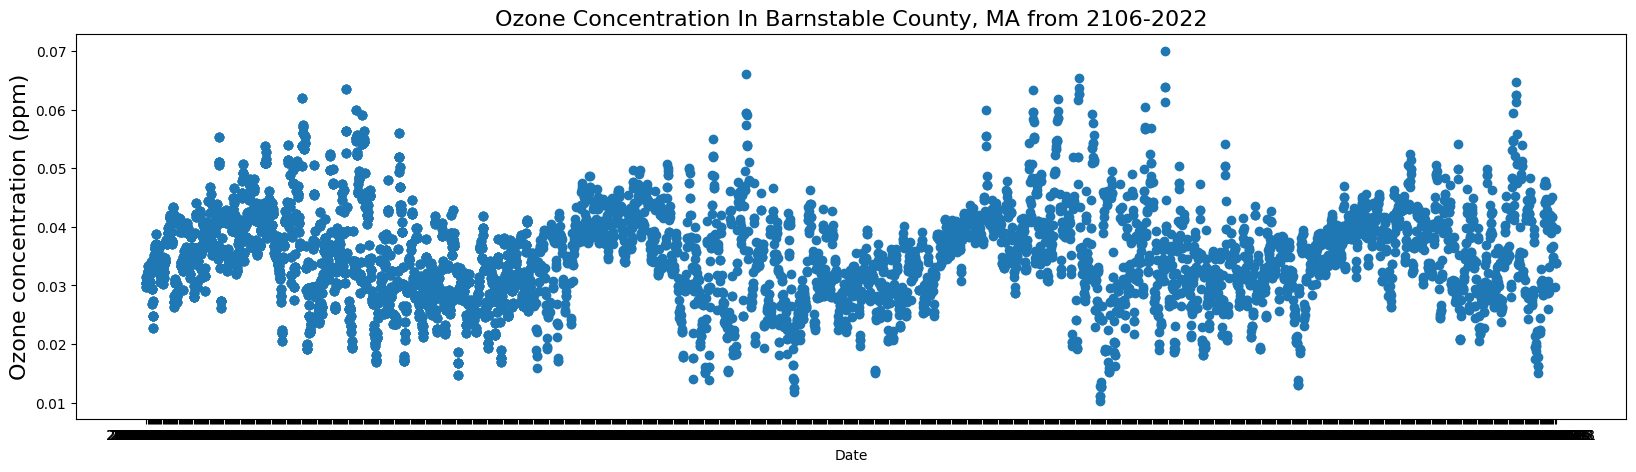

In [86]:
fig=plt.figure()
plt.close(fig)
plt.figure(figsize = (20,5))
plt.xlabel('Date')
plt.ylabel('Ozone concentration (ppm)', fontsize=16)
plt.title('Ozone Concentration In Barnstable County, MA from 2106-2022', fontsize=16)
plt.scatter(x, y)

In [87]:
#Create a new dataframe with the mean ozone value for every date. 
new_result=result.loc[:,["date_local", "arithmetic_mean"]]
new_result

date_local  arithmetic_mean
0    2016-01-01         0.029792
1    2016-01-01         0.030500
2    2016-01-01         0.030500
3    2016-01-02         0.033261
4    2016-01-02         0.032375
..          ...              ...
956  2022-08-28         0.029667
957  2022-08-31         0.039727
958  2022-08-31         0.033846
959  2022-08-31         0.033846
960  2022-08-31         0.033846

[9605 rows x 2 columns]

In [88]:
result_mean = new_result.groupby("date_local")["arithmetic_mean"].mean()
result_mean.to_csv('result_mean.csv')
df = pd.read_csv('result_mean.csv').reset_index()
df

index  date_local  arithmetic_mean
0         0  2016-01-01         0.030551
1         1  2016-01-02         0.032606
2         2  2016-01-03         0.030009
3         3  2016-01-04         0.030737
4         4  2016-01-05         0.033828
...     ...         ...              ...
1314   1314  2022-08-25         0.037788
1315   1315  2022-08-26         0.042154
1316   1316  2022-08-27         0.035142
1317   1317  2022-08-28         0.029667
1318   1318  2022-08-31         0.035316

[1319 rows x 3 columns]

In [89]:
new_df=df.loc[:,["index", "arithmetic_mean"]]
new_df

index  arithmetic_mean
0         0         0.030551
1         1         0.032606
2         2         0.030009
3         3         0.030737
4         4         0.033828
...     ...              ...
1314   1314         0.037788
1315   1315         0.042154
1316   1316         0.035142
1317   1317         0.029667
1318   1318         0.035316

[1319 rows x 2 columns]

Create a scatter plot with time series data using the df dataframe. 

In [90]:
x = df['date_local']
y = df['arithmetic_mean']

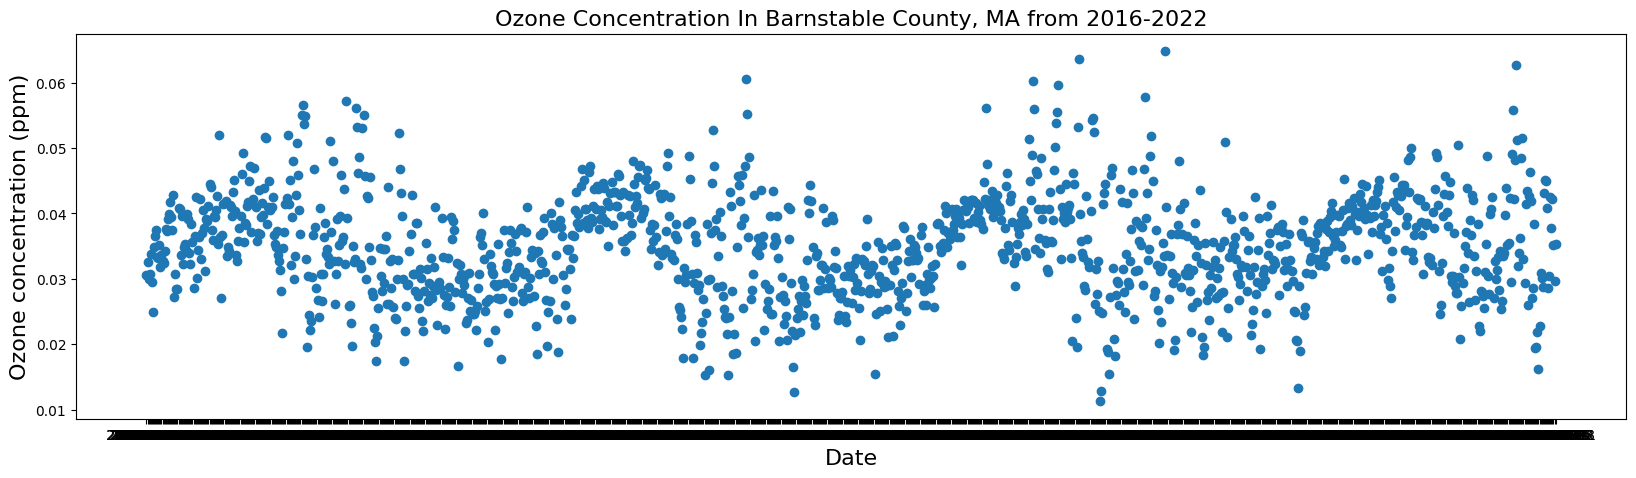

In [91]:
fig=plt.figure()
plt.close(fig)
plt.figure(figsize = (20,5))
plt.xlabel('Date', fontsize=16)
plt.ylabel('Ozone concentration (ppm)', fontsize=16)
plt.title('Ozone Concentration In Barnstable County, MA from 2016-2022', fontsize=16)
plt.scatter(x, y)

Run ARIMA model for the new_df dataframe and forecast data using the ARIMA model (0,0,30) 

In [92]:
model = ARIMA(new_df["arithmetic_mean"], order=(0, 0, 10))
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:        arithmetic_mean   No. Observations:                 1319
Model:                ARIMA(0, 0, 10)   Log Likelihood                4831.651
Date:                Mon, 15 May 2023   AIC                          -9639.303
Time:                        18:44:07   BIC                          -9577.087
Sample:                             0   HQIC                         -9615.976
                               - 1319                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0349      0.000     73.199      0.000       0.034       0.036
ma.L1          0.6196      0.024     26.100      0.000       0.573       0.666
ma.L2          0.2622      0.029      9.176      0.0

Run ARIMA model for the new_df dataframe and forecast data using the ARIMA model (1,2,1) 

In [93]:
model2 = ARIMA(new_df["arithmetic_mean"], order=(1, 2, 1))
model_fit2 = model2.fit()

print(model_fit2.summary())

                               SARIMAX Results                                
Dep. Variable:        arithmetic_mean   No. Observations:                 1319
Model:                 ARIMA(1, 2, 1)   Log Likelihood                4671.183
Date:                Mon, 15 May 2023   AIC                          -9336.365
Time:                        18:44:08   BIC                          -9320.816
Sample:                             0   HQIC                         -9330.535
                               - 1319                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1643      0.024     -6.851      0.000      -0.211      -0.117
ma.L1         -0.9999      1.043     -0.959      0.338      -3.044       1.044
sigma2      4.823e-05   5.03e-05      0.958      0.3

Run ARIMA model for the new_df dataframe and forecast data using the ARIMA model (1,0,0) 

In [94]:
model3 = ARIMA(new_df["arithmetic_mean"], order=(1, 0, 0))
model_fit3 = model3.fit()

print(model_fit3.summary())

                               SARIMAX Results                                
Dep. Variable:        arithmetic_mean   No. Observations:                 1319
Model:                 ARIMA(1, 0, 0)   Log Likelihood                4814.404
Date:                Mon, 15 May 2023   AIC                          -9622.808
Time:                        18:44:08   BIC                          -9607.254
Sample:                             0   HQIC                         -9616.976
                               - 1319                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0349      0.000     81.030      0.000       0.034       0.036
ar.L1          0.5947      0.020     30.318      0.000       0.556       0.633
sigma2      3.953e-05   1.24e-06     31.871      0.0

Repeat the same process for ozone data in Norfolk county during 2016.

In [98]:
Q1 = "https://aqs.epa.gov/data/api/dailyData/byCounty?email=canoi@whitman.edu&key=goldmallard38&param=44201&bdate=20160101&edate=20161231&state=25&county=017"

In [99]:
r1=requests.get(url=Q1)
json_data1=r1.json()
json_data1

{'Header': [{'status': 'Success',
   'request_time': '2023-05-15T21:46:26-04:00',
   'url': 'https://aqs.epa.gov/data/api/dailyData/byCounty?email=canoi@whitman.edu&key=goldmallard38&param=44201&bdate=20160101&edate=20161231&state=25&county=017',
   'rows': 1463}],
 'Data': [{'state_code': '25',
   'county_code': '017',
   'site_number': '0009',
   'parameter_code': '44201',
   'poc': 1,
   'latitude': 42.62668,
   'longitude': -71.362068,
   'datum': 'WGS84',
   'parameter': 'Ozone',
   'sample_duration_code': '1',
   'sample_duration': '1 HOUR',
   'pollutant_standard': 'Ozone 1-hour 1979',
   'date_local': '2016-01-01',
   'units_of_measure': 'Parts per million',
   'event_type': 'No Events',
   'observation_count': 24,
   'observation_percent': 100.0,
   'validity_indicator': 'Y',
   'arithmetic_mean': 0.028625,
   'first_max_value': 0.033,
   'first_max_hour': 12,
   'aqi': None,
   'method_code': '087',
   'method': 'INSTRUMENTAL - ULTRA VIOLET ABSORPTION',
   'local_site_name': 

In [100]:
df10 = pd.json_normalize(json_data1["Data"])
df10.to_csv("output.csv", index=False)
df10

state_code county_code site_number parameter_code  poc  latitude  \
0            25         017        0009          44201    1  42.62668   
1            25         017        0009          44201    1  42.62668   
2            25         017        0009          44201    1  42.62668   
3            25         017        0009          44201    1  42.62668   
4            25         017        0009          44201    1  42.62668   
...         ...         ...         ...            ...  ...       ...   
1458         25         017        0009          44201    1  42.62668   
1459         25         017        0009          44201    1  42.62668   
1460         25         017        0009          44201    1  42.62668   
1461         25         017        0009          44201    1  42.62668   
1462         25         017        0009          44201    1  42.62668   

      longitude  datum parameter sample_duration_code  ... method_code  \
0    -71.362068  WGS84     Ozone                    1  ...         087   
1    -71.362068  WGS84     Ozone                    W  ...         087   
2    -71.362068  WGS84     Ozone                    W  ...         087   
3    -71.362068  WGS84     Ozone                    W  ...         087   
4    -71.362068  WGS84     Ozone                    1  ...         087   
...         ...    ...       ...                  ...  ...         ...   
1458 -71.362068  WGS84     Ozone                    W  ...         087   
1459 -71.362068  WGS84     Ozone                    1  ...         087   
1460 -71.362068  WGS84     Ozone                    W  ...         087   
1461 -71.362068  WGS84     Ozone                    W  ...         087   
1462 -71.362068  WGS84     Ozone                    W  ...         087   

                                      method     local_site_name  \
0     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  USEPA REGION 1 LAB   
1     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  USEPA REGION 1 LAB   
2     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  USEPA REGION 1 LAB   
3     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  USEPA REGION 1 LAB   
4     INSTRUMENTAL - ULTRA VIOLET ABSORPTION  USEPA REGION 1 LAB   
...                                      ...                 ...   
1458  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  USEPA REGION 1 LAB   
1459  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  USEPA REGION 1 LAB   
1460  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  USEPA REGION 1 LAB   
1461  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  USEPA REGION 1 LAB   
1462  INSTRUMENTAL - ULTRA VIOLET ABSORPTION  USEPA REGION 1 LAB   

                                           site_address          state  \
0     11 TECHNOLOGY DRIVE,  EPA NEW ENGLAND REGIONAL...  Massachusetts   
1     11 TECHNOLOGY DRIVE,  EPA NEW ENGLAND REGIONAL...  Massachusetts   
2     11 TECHNOLOGY DRIVE,  EPA NEW ENGLAND REGIONAL...  Massachusetts   
3     11 TECHNOLOGY DRIVE,  EPA NEW ENGLAND REGIONAL...  Massachusetts   
4     11 TECHNOLOGY DRIVE,  EPA NEW ENGLAND REGIONAL...  Massachusetts   
...                                                 ...            ...   
1458  11 TECHNOLOGY DRIVE,  EPA NEW ENGLAND REGIONAL...  Massachusetts   
1459  11 TECHNOLOGY DRIVE,  EPA NEW ENGLAND REGIONAL...  Massachusetts   
1460  11 TECHNOLOGY DRIVE,  EPA NEW ENGLAND REGIONAL...  Massachusetts   
1461  11 TECHNOLOGY DRIVE,  EPA NEW ENGLAND REGIONAL...  Massachusetts   
1462  11 TECHNOLOGY DRIVE,  EPA NEW ENGLAND REGIONAL...  Massachusetts   

         county                            city cbsa_code  \
0     Middlesex  Chelmsford (Chelmsford Center)     14460   
1     Middlesex  Chelmsford (Chelmsford Center)     14460   
2     Middlesex  Chelmsford (Chelmsford Center)     14460   
3     Middlesex  Chelmsford (Chelmsford Center)     14460   
4     Middlesex  Chelmsford (Chelmsford Center)     14460   
...         ...                             ...       ...   
1458  Middlesex  Chelmsford (Chelmsford Center)     14460   
1459  Middlesex  Chelmsford (Chelmsford Cente

In [101]:
new_df10=df10.loc[:,["date_local", "arithmetic_mean"]]
new_df10

date_local  arithmetic_mean
0     2016-01-01         0.028625
1     2016-01-01         0.029375
2     2016-01-01         0.029375
3     2016-01-01         0.030412
4     2016-01-02         0.031087
...          ...              ...
1458  2016-12-30         0.032824
1459  2016-12-31         0.029083
1460  2016-12-31         0.027684
1461  2016-12-31         0.027684
1462  2016-12-31         0.029250

[1463 rows x 2 columns]

Create a dataframe for the ozone concentration during 2016 in Bristol county. 

In [107]:
Q16 = "https://aqs.epa.gov/data/api/dailyData/byCounty?email=canoi@whitman.edu&key=goldmallard38&param=44201&bdate=20160101&edate=20161231&state=25&county=005"

In [108]:
r16=requests.get(url=Q16)
json_data16=r16.json()

In [109]:
df16 = pd.json_normalize(json_data16["Data"])
df16.to_csv("output.csv", index=False)

In [110]:
new_df16=df16.loc[:,["date_local", "arithmetic_mean"]]
new_df16

date_local  arithmetic_mean
0     2016-01-01         0.026435
1     2016-01-01         0.026583
2     2016-01-01         0.026583
3     2016-01-01         0.026882
4     2016-01-02         0.028750
...          ...              ...
2921  2016-12-30         0.029824
2922  2016-12-31         0.030917
2923  2016-12-31         0.030579
2924  2016-12-31         0.030579
2925  2016-12-31         0.034917

[2926 rows x 2 columns]

Create a dataframe for the ozone concentration during 2016 in Dukes county. 

In [111]:
Q17 = "https://aqs.epa.gov/data/api/dailyData/byCounty?email=canoi@whitman.edu&key=goldmallard38&param=44201&bdate=20160101&edate=20161231&state=25&county=007"

In [112]:
r17=requests.get(url=Q17)
json_data17=r17.json()

In [113]:
df17 = pd.json_normalize(json_data17["Data"])
df17.to_csv("output.csv", index=False)

In [114]:
new_df17=df17.loc[:,["date_local", "arithmetic_mean"]]
new_df17

date_local  arithmetic_mean
0     2016-01-01         0.030250
1     2016-01-01         0.030417
2     2016-01-01         0.030417
3     2016-01-01         0.030824
4     2016-01-02         0.033826
...          ...              ...
1450  2016-12-30         0.031588
1451  2016-12-31         0.034542
1452  2016-12-31         0.034632
1453  2016-12-31         0.034632
1454  2016-12-31         0.037917

[1455 rows x 2 columns]

Create a dataframe for the ozone concentration during 2016 in Essex county. 

In [115]:
Q18 = "https://aqs.epa.gov/data/api/dailyData/byCounty?email=canoi@whitman.edu&key=goldmallard38&param=44201&bdate=20160101&edate=20161231&state=25&county=009"

In [116]:
r18=requests.get(url=Q18)
json_data18=r18.json()

In [117]:
df18 = pd.json_normalize(json_data18["Data"])
df18.to_csv("output.csv", index=False)

In [118]:
new_df18=df18.loc[:,["date_local", "arithmetic_mean"]]
new_df18

date_local  arithmetic_mean
0     2016-01-01         0.029667
1     2016-01-01         0.031353
2     2016-01-02         0.029625
3     2016-01-02         0.029235
4     2016-01-03         0.025917
...          ...              ...
4366  2016-12-30         0.034765
4367  2016-12-31         0.032375
4368  2016-12-31         0.031211
4369  2016-12-31         0.031211
4370  2016-12-31         0.031667

[4371 rows x 2 columns]

Create a dataframe for the ozone concentration during 2016 in Franklin county. 

In [119]:
Q19 = "https://aqs.epa.gov/data/api/dailyData/byCounty?email=canoi@whitman.edu&key=goldmallard38&param=44201&bdate=20160101&edate=20161231&state=25&county=011"

In [120]:
r19=requests.get(url=Q19)
json_data19=r19.json()

In [121]:
df19 = pd.json_normalize(json_data19["Data"])
df19.to_csv("output.csv", index=False)

In [122]:
new_df19=df19.loc[:,["date_local", "arithmetic_mean"]]
new_df19

date_local  arithmetic_mean
0     2016-01-01         0.031000
1     2016-01-01         0.030625
2     2016-01-01         0.030625
3     2016-01-02         0.031870
4     2016-01-02         0.030500
...          ...              ...
1451  2016-12-30         0.033235
1452  2016-12-31         0.028182
1453  2016-12-31         0.027000
1454  2016-12-31         0.027000
1455  2016-12-31         0.027833

[1456 rows x 2 columns]

Create a dataframe for the ozone concentration during 2016 in Hampden county. 

In [123]:
Q20 = "https://aqs.epa.gov/data/api/dailyData/byCounty?email=canoi@whitman.edu&key=goldmallard38&param=44201&bdate=20160101&edate=20161231&state=25&county=013"

In [124]:
r20=requests.get(url=Q20)
json_data20=r20.json()

In [125]:
df20 = pd.json_normalize(json_data20["Data"])
df20.to_csv("output.csv", index=False)

In [126]:
new_df20=df20.loc[:,["date_local", "arithmetic_mean"]]
new_df20

date_local  arithmetic_mean
0     2016-01-01         0.029167
1     2016-01-01         0.028917
2     2016-01-01         0.028917
3     2016-01-01         0.029706
4     2016-01-02         0.030087
...          ...              ...
1429  2016-12-30         0.030471
1430  2016-12-31         0.026917
1431  2016-12-31         0.026158
1432  2016-12-31         0.026158
1433  2016-12-31         0.028250

[1434 rows x 2 columns]

Create a dataframe for the ozone concentration during 2016 in Hampshire county. 

In [127]:
Q21 = "https://aqs.epa.gov/data/api/dailyData/byCounty?email=canoi@whitman.edu&key=goldmallard38&param=44201&bdate=20160101&edate=20161231&state=25&county=015"

In [128]:
r21=requests.get(url=Q21)
json_data21=r21.json()

In [129]:
df21 = pd.json_normalize(json_data1["Data"])
df21.to_csv("output.csv", index=False)

In [130]:
new_df21=df21.loc[:,["date_local", "arithmetic_mean"]]
new_df21

date_local  arithmetic_mean
0     2016-01-01         0.028625
1     2016-01-01         0.029375
2     2016-01-01         0.029375
3     2016-01-01         0.030412
4     2016-01-02         0.031087
...          ...              ...
1458  2016-12-30         0.032824
1459  2016-12-31         0.029083
1460  2016-12-31         0.027684
1461  2016-12-31         0.027684
1462  2016-12-31         0.029250

[1463 rows x 2 columns]

Create a dataframe for the ozone concentration during 2016 in Norfolk county. 

In [131]:
Q22 = "https://aqs.epa.gov/data/api/dailyData/byCounty?email=canoi@whitman.edu&key=goldmallard38&param=44201&bdate=20160101&edate=20161231&state=25&county=021"

In [132]:
r22=requests.get(url=Q22)
df22.to_csv("output.csv", index=False)

NameError: name 'df22' is not defined

In [ ]:
df22 = pd.json_normalize(json_data22["Data"])
df22.to_csv("output.csv", index=False)

In [ ]:
new_df22=df22.loc[:,["date_local", "arithmetic_mean"]]
new_df22

Create a dataframe for the ozone concentration during 2016 in Plymouth county. 

In [ ]:
Q23 = "https://aqs.epa.gov/data/api/dailyData/byCounty?email=canoi@whitman.edu&key=goldmallard38&param=44201&bdate=20160101&edate=20161231&state=25&county=023"

In [ ]:
r23=requests.get(url=Q23)
json_data23=r23.json()

In [ ]:
df23 = pd.json_normalize(json_data23["Data"])
df23.to_csv("output.csv", index=False)

In [ ]:
new_df23=df23.loc[:,["date_local", "arithmetic_mean"]]
new_df23

Create a dataframe for the ozone concentration during 2016 in Suffolk county. 

In [ ]:
Q24 = "https://aqs.epa.gov/data/api/dailyData/byCounty?email=canoi@whitman.edu&key=goldmallard38&param=44201&bdate=20160101&edate=20161231&state=25&county=025"

In [ ]:
r24=requests.get(url=Q24)
json_data24=r24.json()

In [ ]:
df24 = pd.json_normalize(json_data24["Data"])
df24.to_csv("output.csv", index=False)

In [ ]:
new_df24=df24.loc[:,["date_local", "arithmetic_mean"]]
new_df24

Create a dataframe for the ozone concentration during 2016 in Worcester county. 

In [136]:
Q25 = "https://aqs.epa.gov/data/api/dailyData/byCounty?email=canoi@whitman.edu&key=goldmallard38&param=44201&bdate=20160101&edate=20161231&state=25&county=027"

In [137]:
r25=requests.get(url=Q25)
json_data25=r25.json()

In [138]:
df25 = pd.json_normalize(json_data25["Data"])
df25.to_csv("output.csv", index=False)

In [139]:
new_df25=df25.loc[:,["date_local", "arithmetic_mean"]]
new_df25

date_local  arithmetic_mean
0     2016-01-04         0.028417
1     2016-01-01         0.030783
2     2016-01-02         0.032583
3     2016-01-03         0.029043
4     2016-01-01         0.031000
...          ...              ...
2923  2016-12-31         0.030542
2924  2016-12-31         0.030053
2925  2016-12-31         0.030053
2926  2016-12-31         0.033667
2927  2016-12-24         0.024091

[2928 rows x 2 columns]

Merge all the dataframes that contain 2016 data.

In [ ]:
from functools import reduce

dfs = [new_df1, new_df10, new_df16, new_df17, new_df18, new_df19, new_df20, new_df21, new_df22, new_df23, new_df24, new_df25]
merged_df = reduce(lambda left, right: pd.merge(left, right, on='arithmetic_mean', how='left'), dfs)


In [ ]:
merged_df